In [2]:
#Inspect the raw data
import pandas as pd
data_path = '~/Library/CloudStorage/OneDrive-国立大学法人東海国立大学機構/Weekly_challenges/Data science and Analytics/Japan_Life_Expectency/data/raw/Japan_Life_Expectancy.xlsx'
data=pd.read_excel(data_path)
#display columns
print(data.columns)
#display data
pd.set_option('display.max_columns', None)#display all columns
print(data)
#Display the first n rows 
print(data.head(10))
#check column names, types and missing data
print(data.info())
#Get some insight on your data column such as mean, std, min, max
print(data.describe())


Index(['Prefecture', 'Life_expectancy', 'Physician', 'Junior_col',
       'University', 'Public_Hosp', 'Pshic_hosp', 'Beds_psic', 'Nurses',
       'Avg_hours', 'Salary', 'Elementary_school', 'Sport_fac', 'Park',
       'Forest', 'Income_per capita', 'Density_pop', 'Hospitals', 'Beds',
       'Ambulances', 'Health_exp', 'Educ_exp', 'Welfare_exp'],
      dtype='object')
   Prefecture  Life_expectancy  Physician  Junior_col  University  \
0       Aichi            84.65      224.4        13.6        23.7   
1       Akita            83.79      242.6        11.3        11.9   
2      Aomori            82.80      212.5        11.4        11.8   
3       Chiba            84.48      205.8        14.7        24.9   
4       Ehime            84.24      276.7        14.2        18.0   
5       Fukui            84.91      257.9        12.9        18.8   
6     Fukuoka            84.54      309.9        14.2        20.4   
7   Fukushima            83.71      205.7        11.6        13.1   
8       

In [ ]:
#Handle missing values
print(data.isnull().sum()) #No empty cells

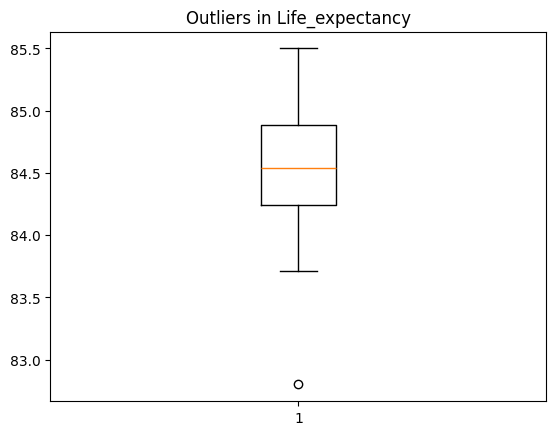

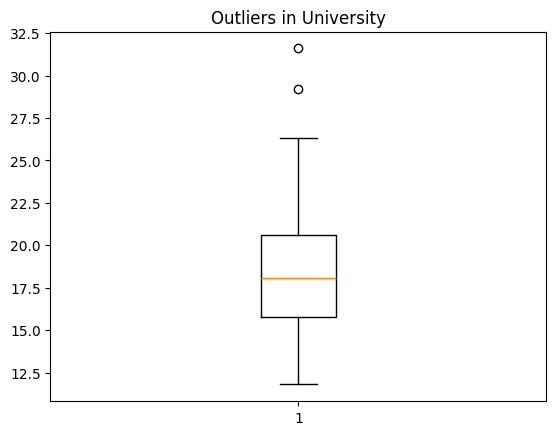

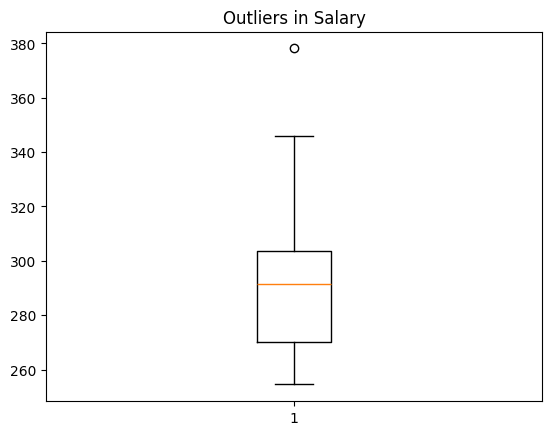

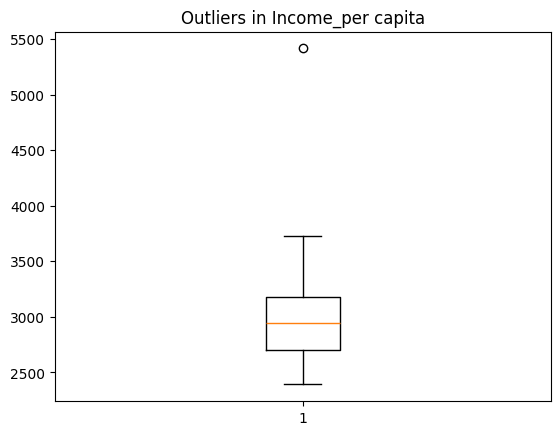

Life expectancy Outlier 
2    Aomori
Name: Prefecture, dtype: object
University Outliers 
 18    Kanagawa
40       Tokyo
Name: Prefecture, dtype: object
Salary Outlier 
 40    Tokyo
Name: Prefecture, dtype: object
Income per capita 
 40    Tokyo
Name: Prefecture, dtype: object


In [8]:
#Handle outliers if they exist
import matplotlib.pyplot as plt
#visualize outliers
columns=['Life_expectancy', 'University', 'Salary', 'Income_per capita']
for column in columns:
    plt.boxplot(data[column])
    plt.title(f"Outliers in {column}")
    plt.show()
    
print(f"Life expectancy Outlier \n{data[data['Life_expectancy']<83.5]['Prefecture']}")#Aomori is an outlier
print(f"University Outliers \n {data[27.5<data['University']]['Prefecture']}")#Kanagawa and Tokyo are outliers 
print(f"Salary Outlier \n {data[360<data['Salary']]['Prefecture']}")#Tokyo is an outlier
print(f"Income per capita \n {data[4000<data['Income_per capita']]['Prefecture']}") #Tokyo is an outlier

In [24]:
#prefectures with best and worst life expectancy
life_expectancy=data[(data['Life_expectancy'] == data['Life_expectancy'].max()) | (data['Life_expectancy'] == data['Life_expectancy'].min())]
key_feature=data[(data['Physician'] == data['Physician'].max()) & (data['Junior_col'] == data['Junior_col'].max()) | (data['Park'] == data['Park'].max())]
display(life_expectancy)
display(key_feature)


,Prefecture,Life_expectancy,Physician,Junior_col,University,Public_Hosp,Pshic_hosp,Beds_psic,Nurses,Avg_hours,Salary,Elementary_school,Sport_fac,Park,Forest,Income_per capita,Density_pop,Hospitals,Beds,Ambulances,Health_exp,Educ_exp,Welfare_exp
2,Aomori,82.8,212.5,11.4,11.8,42.9,1.4,348.7,1108.8,174.5,254.50,22.0,554.4,11.8,63.6,2507,380.5,6.2,1112.8,9.1,3.40,20.98,15.92
35,Shiga,85.5,236.3,14.9,22.4,34.0,0.5,161.3,895.4,173.0,310.85,11.9,407.4,37.3,50.7,3318,1087.8,3.5,861.2,4.7,3.68,27.02,15.43


,Prefecture,Life_expectancy,Physician,Junior_col,University,Public_Hosp,Pshic_hosp,Beds_psic,Nurses,Avg_hours,Salary,Elementary_school,Sport_fac,Park,Forest,Income_per capita,Density_pop,Hospitals,Beds,Ambulances,Health_exp,Educ_exp,Welfare_exp
35,Shiga,85.5,236.3,14.9,22.4,34.0,0.5,161.3,895.4,173.0,310.85,11.9,407.4,37.3,50.7,3318,1087.8,3.5,861.2,4.7,3.68,27.02,15.43


In [18]:
# Generate a summary statistics of cleaned data
data_Path = '~/Library/CloudStorage/OneDrive-国立大学法人東海国立大学機構/Weekly_challenges/Data science and Analytics/Japan_Life_Expectency/data/processed/Cleaned_Japan_Life_Expectancy.xlsx'
data=pd.read_excel(data_Path)
print(data.columns)
print(data.describe())

Index(['Prefecture', 'Life_expectancy', 'Physician_100kP', 'Junior_col_%',
       'University_%', 'Public_Hosp_%', 'Psych_Hosp_100kP', 'Psych_Beds_100kP',
       'Nurses_100kP', 'Avg_Work_Hours_Month', 'Salary', 'Elementary_school',
       'Sport_fac_1MP', 'Park_Land_%', 'Forest_Land_%', 'Income_capita',
       'Population_Density_km2', 'General_Hospital_100kP',
       'General_Hospital_Beds_100k', 'Ambulances_100kP',
       'Health_Expenditure_%', 'Educ_Expenditure_%', 'Welfare_Expenditure_%',
       'Prefecture_encoded', 'Socioeconomic_index'],
      dtype='object')
       Life_expectancy  Physician_100kP  Junior_col_%  University_%  \
count        47.000000        47.000000     47.000000     47.000000   
mean         84.525745         0.520786      0.415653      0.344509   
std           0.503133         0.254974      0.221998      0.225243   
min          82.800000         0.000000      0.000000      0.000000   
25%          84.240000         0.327522      0.276786      0.199495   

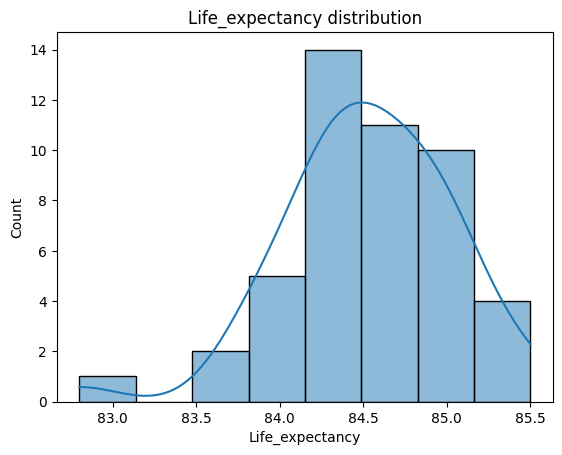

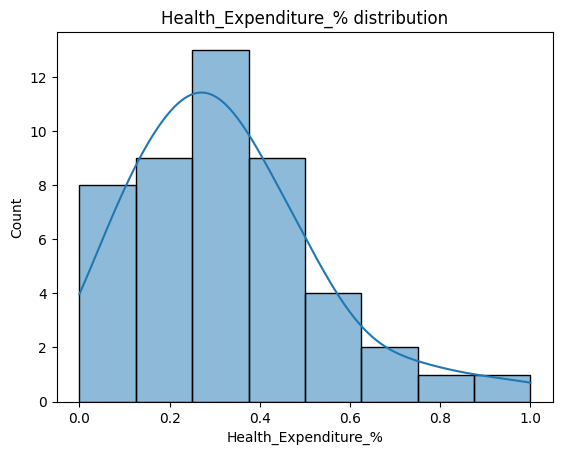

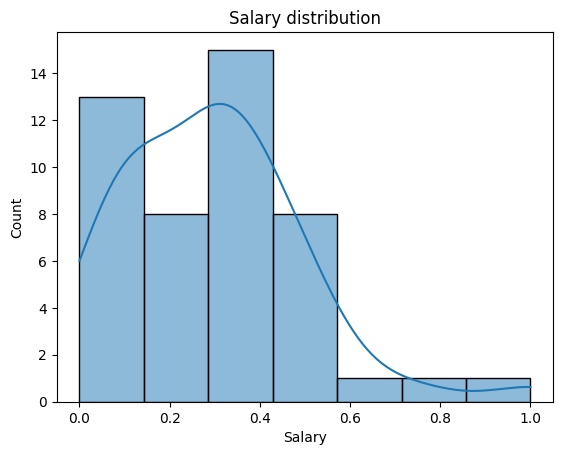

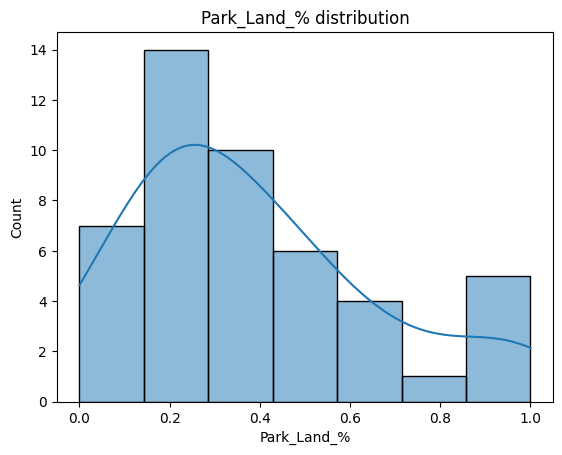

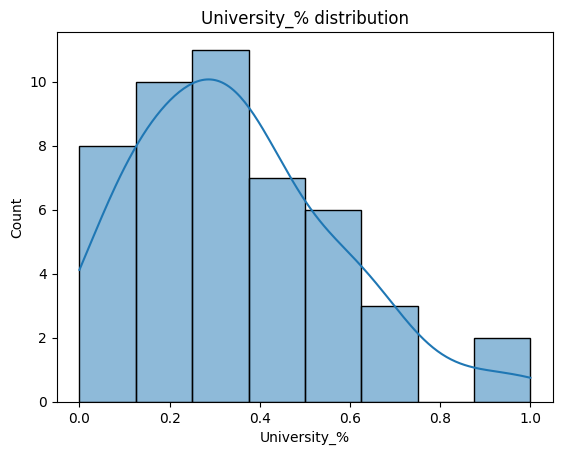

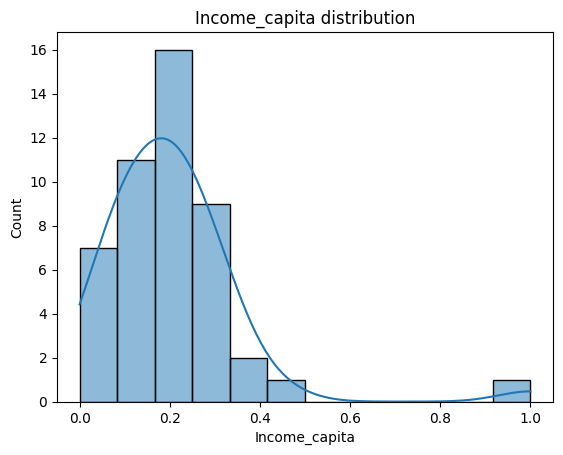

In [10]:
# Plot distributions of features of cleaned data
import seaborn as sns 
import matplotlib.pyplot as plt
#Histograms of key features
#Distribution of life expectancy, health expenditure, salary, park land, university
columns=['Life_expectancy', 'Health_Expenditure_%', 'Salary', 'Park_Land_%', 'University_%', 'Income_capita']
for column in columns:
    sns.histplot(data[column], kde=True)
    plt.title(f"{column} distribution")
    plt.xlabel(f"{column}")
    plt.show()

                            Life_expectancy  Physician_100kP  Junior_col_%  \
Life_expectancy                    1.000000         0.321545      0.569207   
Physician_100kP                    0.321545         1.000000     -0.035781   
Junior_col_%                       0.569207        -0.035781      1.000000   
University_%                       0.560164         0.085263      0.493770   
Public_Hosp_%                     -0.091038        -0.222218     -0.236237   
Psych_Hosp_100kP                  -0.240471         0.284066     -0.286641   
Psych_Beds_100kP                  -0.263259         0.412624     -0.315751   
Nurses_100kP                      -0.054996         0.634156     -0.168570   
Avg_Work_Hours_Month              -0.111068         0.087101     -0.157295   
Salary                             0.406123         0.000284      0.346947   
Elementary_school                 -0.559066        -0.161057     -0.549658   
Sport_fac_1MP                     -0.130514         0.011963    

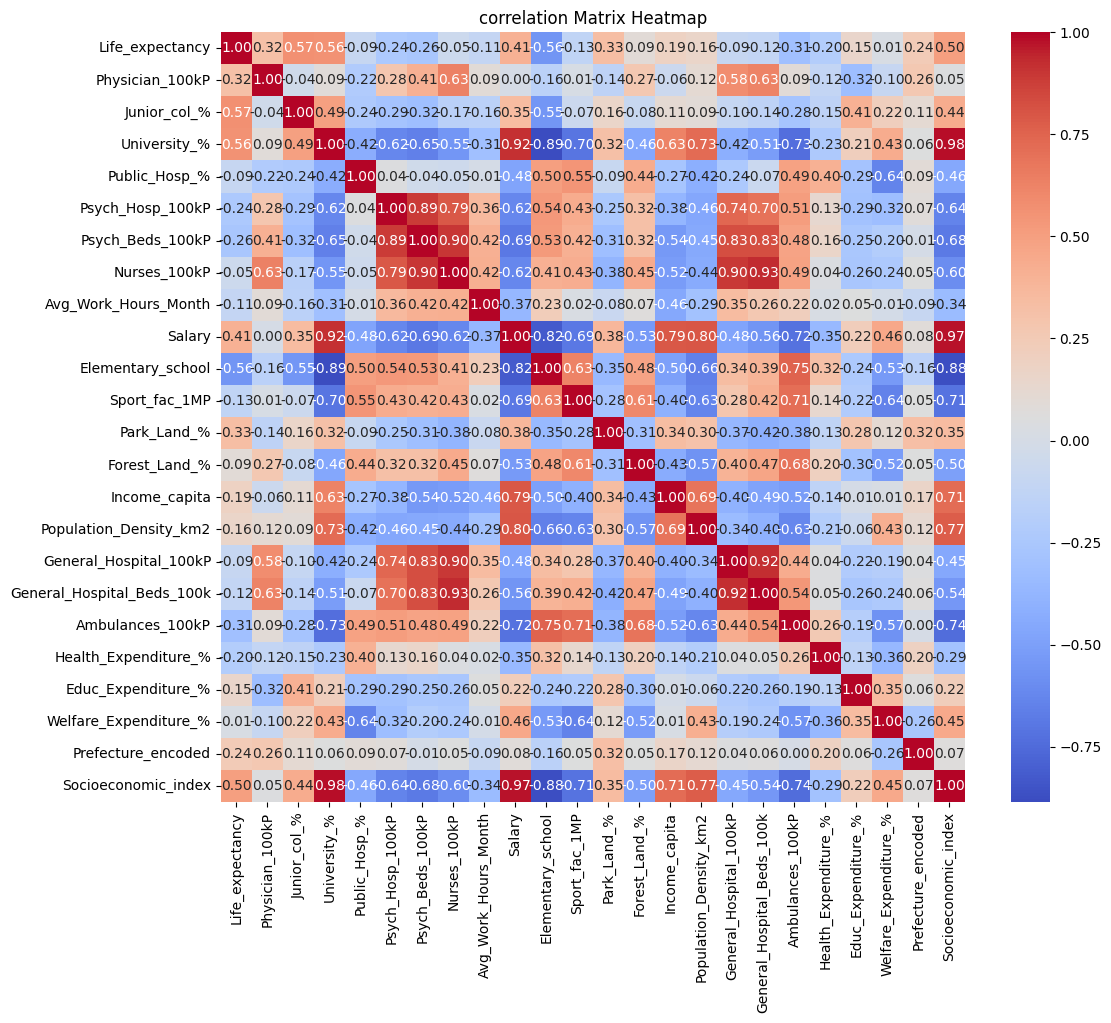

In [19]:
# Correlation Heatmap
#select only numerical data 
numeric_data=data.select_dtypes(include=["float64", "int64"])
#compute correlation matrix
plt.figure(figsize=(12, 10))
correlation_Matrix=numeric_data.corr()
print(correlation_Matrix)
#plot heatmap rounding to 2 decimals: Primary finding strong correlation between life expectancy and (people finished junior high school and college and higher salaries)
sns.heatmap(correlation_Matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("correlation Matrix Heatmap")
plt.show()

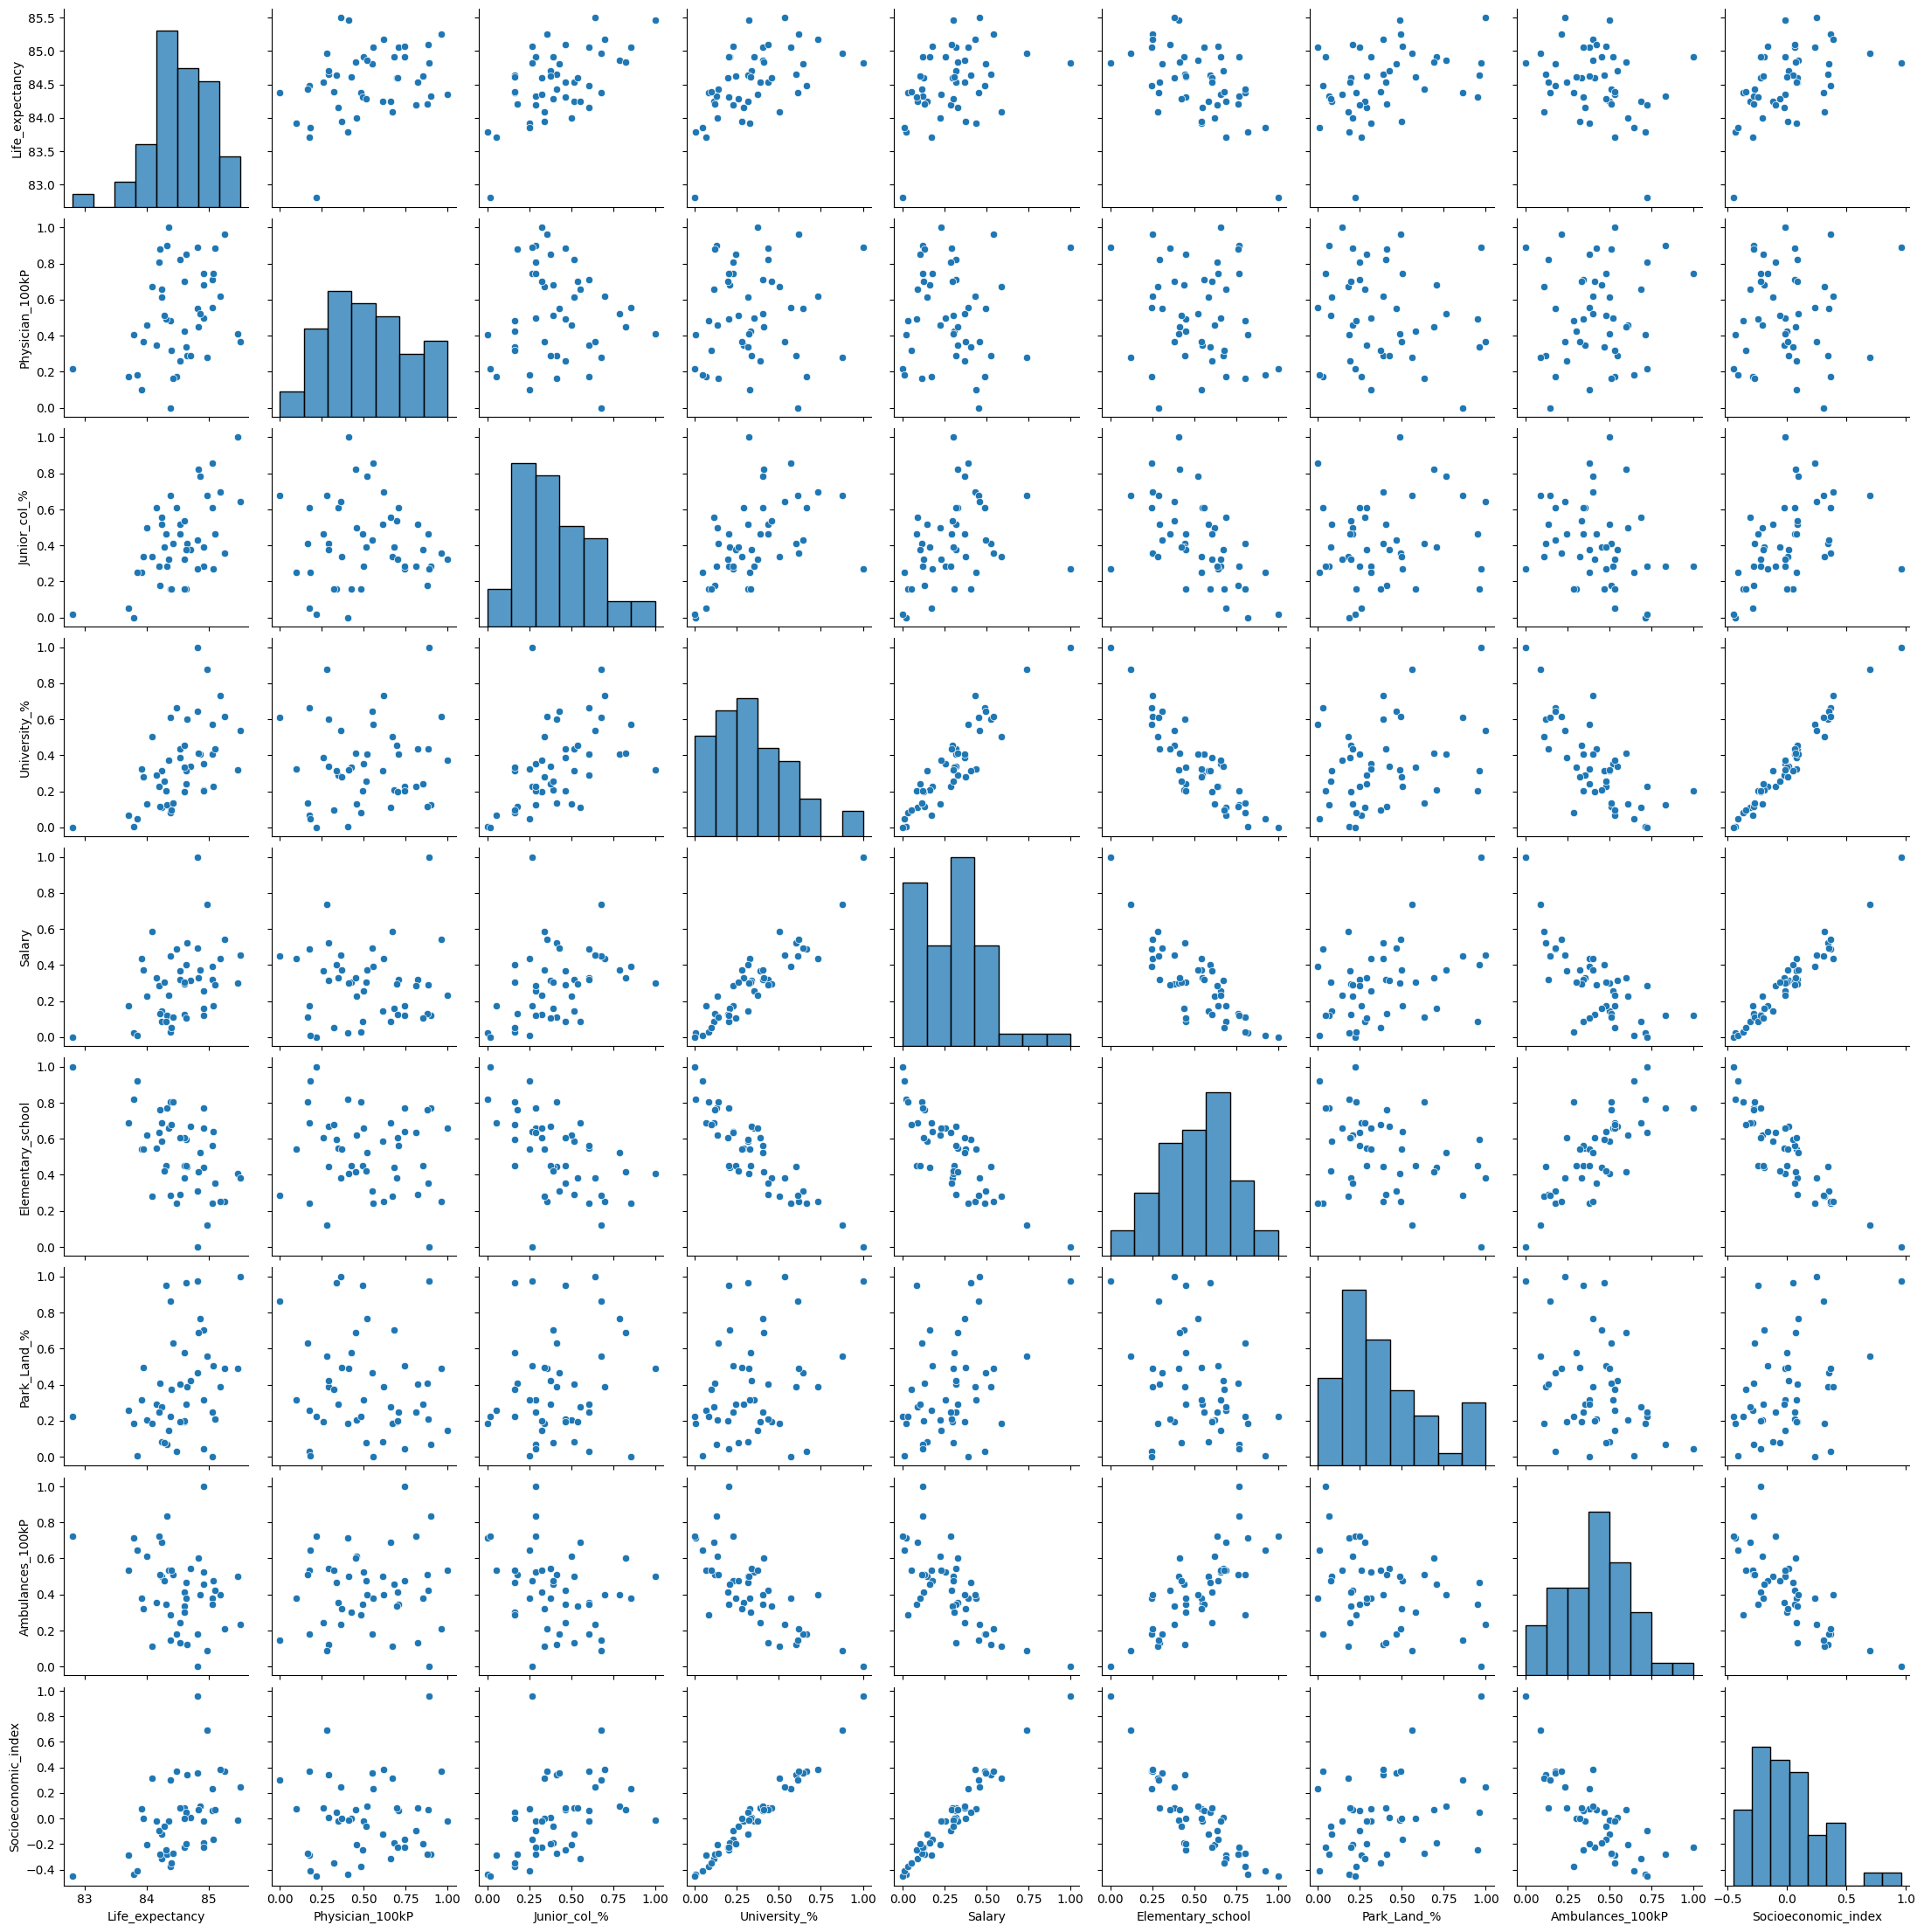

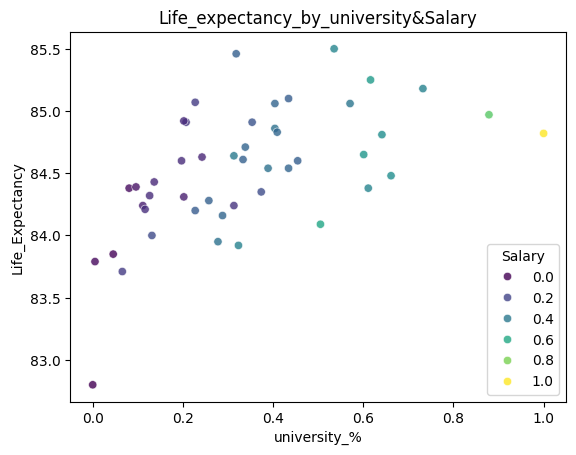

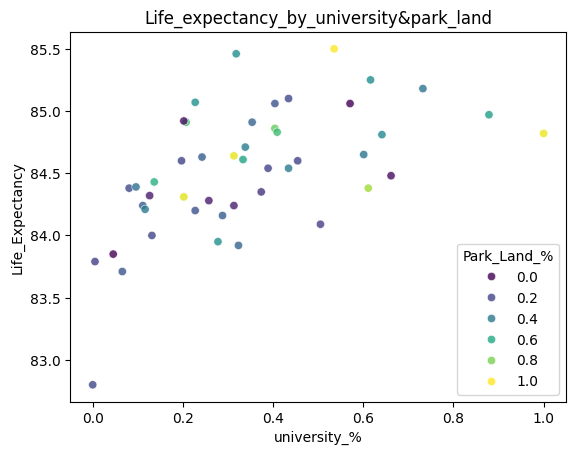

In [20]:
#Pair plots for key features 
key_features=['Life_expectancy', 'Physician_100kP','Junior_col_%', 'University_%', 'Salary','Elementary_school', 'Park_Land_%', 'Ambulances_100kP', 'Socioeconomic_index']
sns.pairplot(data[key_features])
plt.show()
#Scatter plot for feature interaction
sns.scatterplot(x='University_%', y='Life_expectancy', hue='Salary', palette='viridis', alpha=0.8, data=data)
plt.title('Life_expectancy_by_university&Salary')
plt.xlabel('university_%')
plt.ylabel('Life_Expectancy')
plt.show()
sns.scatterplot(x='University_%', y='Life_expectancy', hue='Park_Land_%', palette='viridis', alpha=0.8, data=data)
plt.title('Life_expectancy_by_university&park_land')
plt.xlabel('university_%')
plt.ylabel('Life_Expectancy')
plt.show()

In [22]:
#multi colinearity check for Linear Regression model (others are not influenced)
from statsmodels.stats.outliers_influence import variance_inflation_factor
#calculate VIF: variance inlation factor
X0=data[['Physician_100kP','Junior_col_%', 'University_%', 'Salary','Elementary_school', 'Park_Land_%', 'Ambulances_100kP']]
X1=data[['Physician_100kP','Junior_col_%', 'Socioeconomic_index','Elementary_school', 'Park_Land_%', 'Ambulances_100kP']]
X2=data[['Physician_100kP','Junior_col_%', 'Socioeconomic_index', 'Park_Land_%', 'Ambulances_100kP']]

vif_data=pd.DataFrame()

vif_data = pd.DataFrame()

for idx, X in enumerate([X0, X1, X2], start=1):
    vif_temp = pd.DataFrame()
    vif_temp["feature"] = X.columns
    vif_temp["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif_temp["DataFrame"] = f"X{idx}"
    vif_data = pd.concat([vif_data, vif_temp], ignore_index=True)

print(vif_data)

                feature        VIF DataFrame
0       Physician_100kP   5.622154        X1
1          Junior_col_%   6.867820        X1
2          University_%  32.794539        X1
3                Salary  23.999525        X1
4     Elementary_school  13.636942        X1
5           Park_Land_%   3.528130        X1
6      Ambulances_100kP  15.883037        X1
7       Physician_100kP   4.708642        X2
8          Junior_col_%   4.763806        X2
9   Socioeconomic_index   2.914909        X2
10    Elementary_school  14.937434        X2
11          Park_Land_%   3.244443        X2
12     Ambulances_100kP  15.638122        X2
13      Physician_100kP   4.648546        X3
14         Junior_col_%   4.751485        X3
15  Socioeconomic_index   2.636571        X3
16          Park_Land_%   2.730332        X3
17     Ambulances_100kP   7.886576        X3


# Observations from EDA

Using correlation Heatmap : 
- Strong positive correlation between `University_%`,`Junior_col_%` and `Life_expectancy` (+0.57)
- Moderately Strong positive correlation between `Physician_100kP`,`Park_land_%`,`Salary` and `Life_expectancy`(~0.3~0.4)
- Strong Negative correlation for `Elementary_school_%` (-0.56),Moderate negative correlation for `Ambulances` suggesting that higher elementary education percentages and higher general hospital beds correspond to lower life expectancy.
- Salary shows a complex, nonlinear relationship with life expectancy (further investigation required).
- Using VIF theres a severe multicolinearity between  `University_%`,`Salary`
